In [1]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#dataframe
import pandas as pd

# Splitting data
from sklearn.model_selection import train_test_split

# Metrics 
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import os
import numpy as np

#one hot encoding
from tensorflow.keras.utils import to_categorical

#Data Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#model layers
from tensorflow.keras.models import Model,Sequential,load_model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, BatchNormalization, Dropout, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.applications.resnet import ResNet50

#callbcks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

#image preprocessing
from PIL import Image
import cv2


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [25]:
df_Traffic = pd.read_csv('/content/drive/MyDrive/DBDA_PROJECT/archive/labelscsv.csv')
df_Traffic.head()


,CLASS_ID,NAME
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


# **total number of images**

In [ ]:
#total number of images 

num_imgs = 0

for i in range(43):
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/'+str(i)+'/'):
        num_imgs += 1
        
print("number of images in the dataset {}".format(num_imgs))


number of images in the dataset 39249


In [ ]:
# displaying one image from each class

# **number of images belonging to each classes visuals**

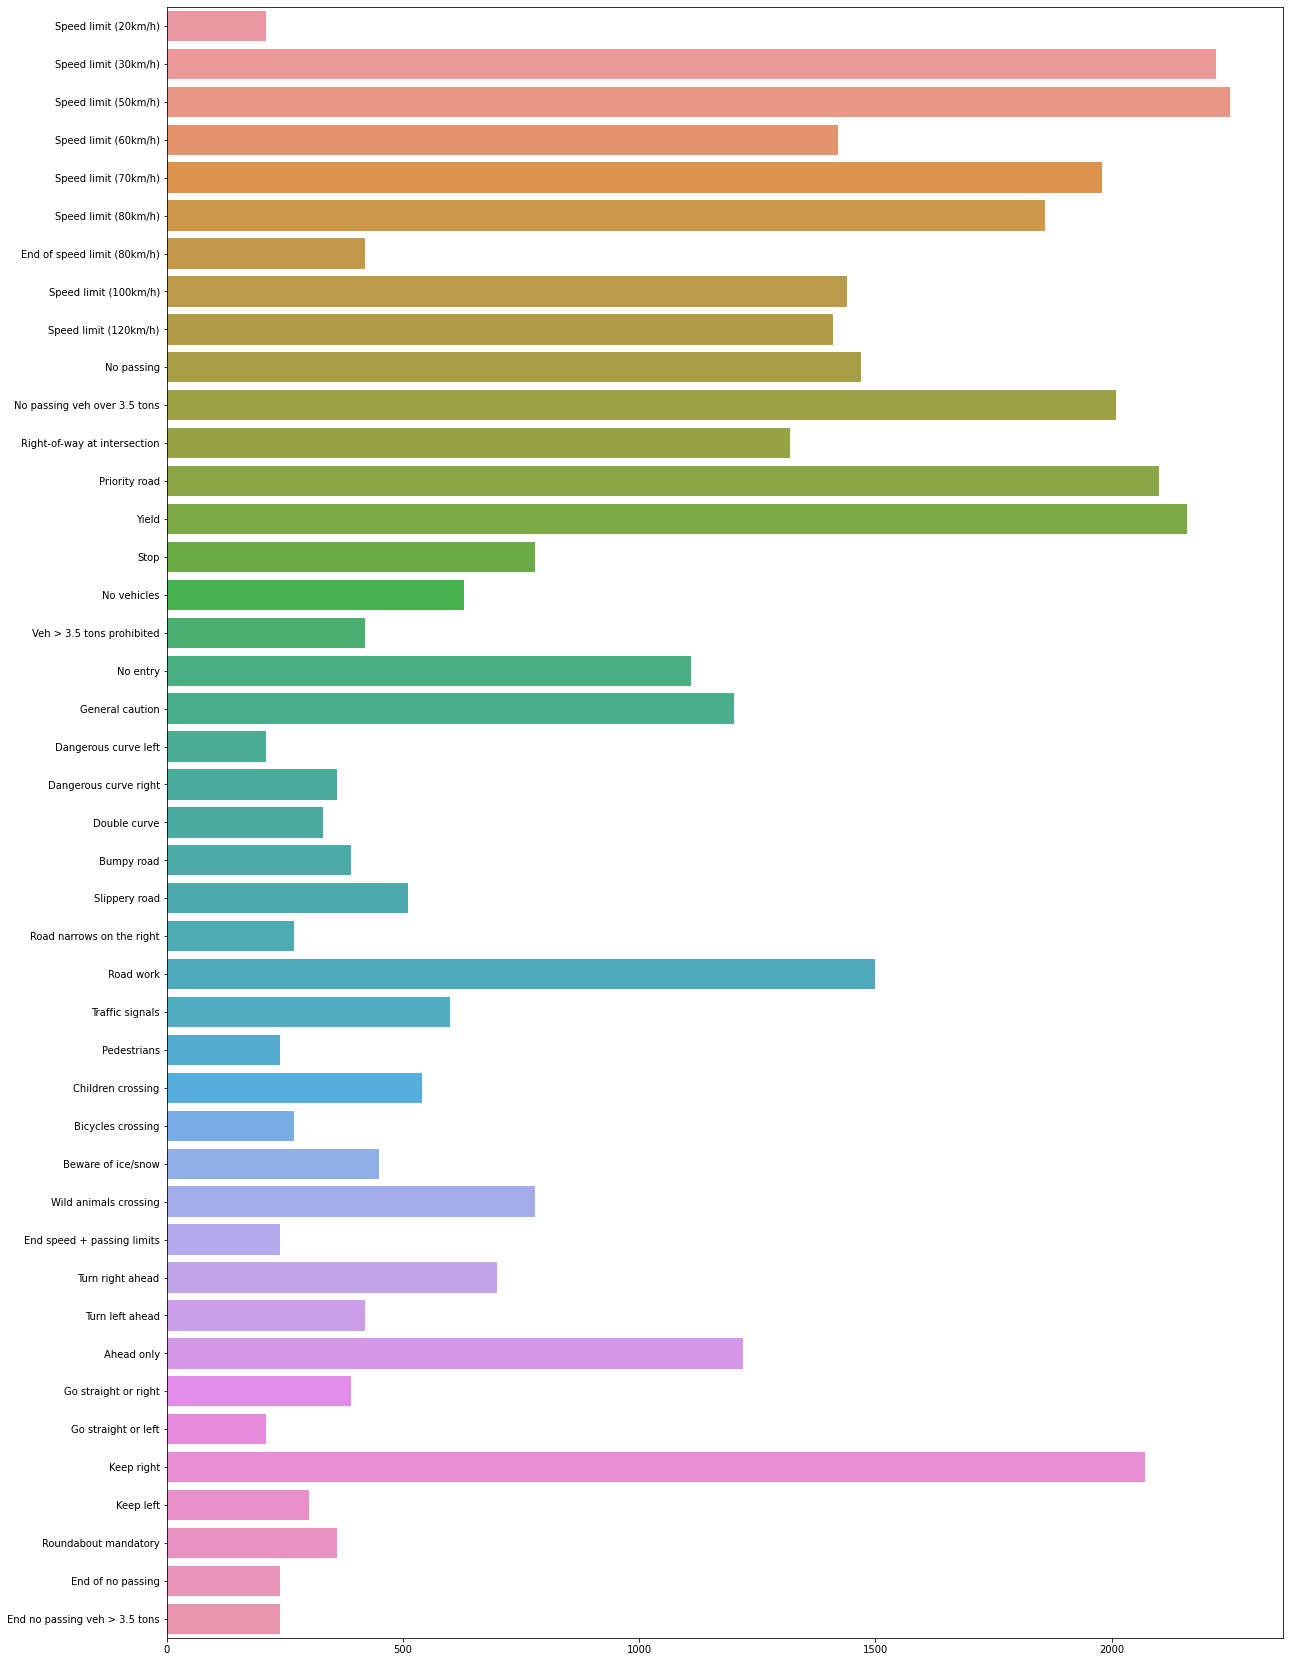

In [ ]:
#number of images belonging to each classes

num_of_imgs = dict()

for labels in range(43):
    imgs = 0
    for img in os.listdir('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/' + str(labels) + '/'):
        imgs += 1
        
    num_of_imgs[df['NAME'][labels]] = imgs
    
X = list(num_of_imgs.keys())
Y = list(num_of_imgs.values())

plt.figure(figsize=(20, 30))
sns.barplot(y = X,
            x = Y
           )
 

## **Loading Dataset.**

In [ ]:
datagen = ImageDataGenerator()

In [ ]:
data = datagen.flow_from_directory('/content/drive/MyDrive/DBDA_PROJECT/archive/Train/',
                                    target_size=(32, 32),
                                    batch_size=39249,
                                    class_mode='categorical',
                                    shuffle=True,
                                    seed=42)

Found 39249 images belonging to 43 classes.


In [ ]:
X , y = data.next()

In [ ]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)


In [ ]:
X = np.array(X)
y = np.array(y)

In [ ]:
# Save Labels & Data for future use
# os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data')
os.mkdir('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target')


In [ ]:
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data', X)
np.save('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target', y)

In [3]:
# Load data & Labels
X=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_data.npy')
y=np.load('/content/drive/MyDrive/DBDA_PROJECT/training/dir_target.npy')

In [4]:
print(f"Data Shape   :{X.shape}\nLabels shape :{y.shape}")

Data Shape   :(39249, 32, 32, 3)
Labels shape :(39249, 43)



# **Spliting Data**



In [5]:
X_train_m, X_test, y_train_m, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
print("Train Shape: {}\nTest Shape : {}".format(X_train_m.shape, X_test.shape))


Train Shape: (31399, 32, 32, 3)
Test Shape : (7850, 32, 32, 3)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X_train_m, y_train_m, test_size=0.2, random_state=42)

In [8]:
print("X_Train Shape: {}\nX_Validation Shape : {}".format(X_train.shape, X_val.shape))

X_Train Shape: (25119, 32, 32, 3)
X_Validation Shape : (6280, 32, 32, 3)


In [9]:
print("y_Train Shape: {}\ny_Validation Shape : {}".format(y_train.shape, y_val.shape))

y_Train Shape: (25119, 43)
y_Validation Shape : (6280, 43)


# Preprocess

### 1.   Gaussian noise
### 2.   Image rotation



# Build model for unbalanced data using CNN


## Model 1 CNN





In [10]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [11]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 64)          36928     
                                                        

In [13]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/25
393/393 [==============================] - 8s 10ms/step - loss: 2.5427 - accuracy: 0.4368 - val_loss: 0.7467 - val_accuracy: 0.8435
Epoch 2/25
393/393 [==============================] - 4s 11ms/step - loss: 0.8800 - accuracy: 0.7456 - val_loss: 0.3853 - val_accuracy: 0.9189
Epoch 3/25
393/393 [==============================] - 4s 10ms/step - loss: 0.5918 - accuracy: 0.8242 - val_loss: 0.2885 - val_accuracy: 0.9350
Epoch 4/25
393/393 [==============================] - 4s 10ms/step - loss: 0.4680 - accuracy: 0.8587 - val_loss: 0.2003 - val_accuracy: 0.9446
Epoch 5/25
393/393 [==============================] - 3s 7ms/step - loss: 0.4170 - accuracy: 0.8735 - val_loss: 0.1398 - val_accuracy: 0.9602
Epoch 6/25
393/393 [==============================] - 3s 7ms/step - loss: 0.3433 - accuracy: 0.8961 - val_loss: 0.1228 - val_accuracy: 0.9664
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.3161 - accuracy: 0.9050 - val_loss: 0.1161 - val_accuracy: 0.9682
Ep

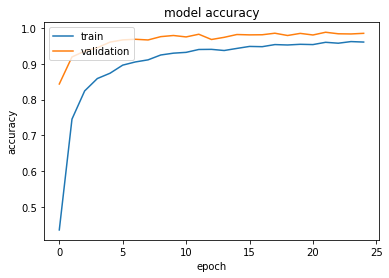

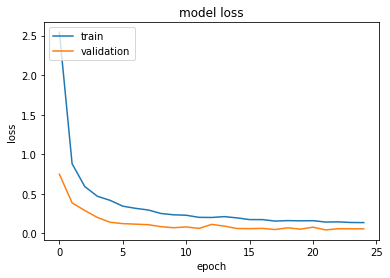

In [14]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Testing on Test Set

In [15]:
Y_pred = np.argmax(model.predict(X_test), axis=1)

In [16]:
Y_pred

array([23, 25, 27, ..., 23, 41,  9])

In [17]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg=np.argmax(y_test,axis=1)

In [18]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg, Y_pred))

0.9847133757961783


In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test_arg, Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        36
           1       0.98      0.95      0.97       454
           2       1.00      1.00      1.00       439
           3       0.98      0.98      0.98       265
           4       1.00      1.00      1.00       421
           5       0.99      1.00      0.99       432
           6       0.99      0.99      0.99       162
           7       0.99      0.97      0.98       117
           8       0.98      0.99      0.98        81
           9       0.99      1.00      1.00       227
          10       1.00      0.98      0.99       246
          11       0.98      1.00      0.99        42
          12       0.98      0.97      0.98       454
          13       0.98      0.96      0.97        57
          14       1.00      0.93      0.96        68
          15       0.99      1.00      0.99        82
          16       0.97      0.99      0.98        94
          17       1.00    

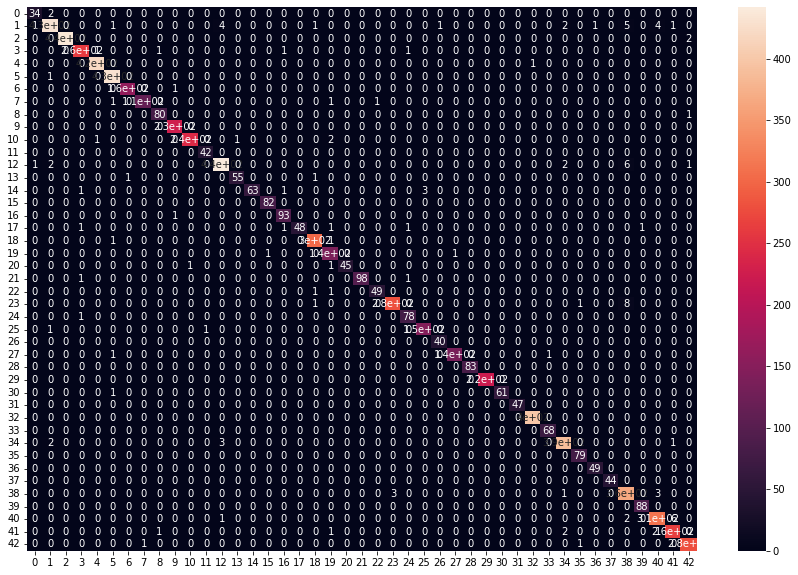

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as metrics
import seaborn as sns
cm = metrics.confusion_matrix(y_test_arg, Y_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True,)
plt.show()

In [ ]:
# class-wise accuracy

In [26]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()

In [28]:
classwise_acc = cm.diagonal()/cm.sum(axis=1) * 100

In [29]:
imbalance_cnn_acc1=classwise_acc.tolist()

In [30]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalance_cnn_acc1}, columns = ['Class_Label', 'Accuracy'])

In [31]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,94.44
1,95.37
2,99.54
3,98.49
4,99.76
5,99.77
6,99.38
7,97.44
8,98.77
9,100.00


In [32]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [33]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg, Y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg, Y_pred,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg, Y_pred,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg, Y_pred,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.984713
Precision: 0.984863
Recall: 0.984713
F1 score: 0.984698


In [34]:
mod="imbalanced_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_cnn,0.9847133757961783,0.9848628544847038,0.9847133757961783,0.9846980357123365


In [35]:
# saving the dataframe
df.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/imbalanced_cnn1.csv',encoding = 'utf-8-sig')

In [36]:
# saving the model
model.save("/content/drive/MyDrive/DBDA_PROJECT/model/imbalanced_cnn.h5")

In [37]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg, y_pred =  Y_pred, output_dict=True)).transpose()
clsf_report.to_csv('imbalanced_cnn.csv', index= True)


## model 2 - ResNet50 with 152 layers


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model1 = Model(inputs = resnet_preTrained.input, outputs = output)
model1.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                              

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model1.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:

#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)



In [ ]:
#training the model
n_epochs = 25
history1 =  model1.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val),epochs = n_epochs, verbose = 1)


Epoch 1/25
99/99 [==============================] - 16s 98ms/step - loss: 1.7222 - accuracy: 0.4950 - val_loss: 2.5682 - val_accuracy: 0.2925
Epoch 2/25
99/99 [==============================] - 7s 69ms/step - loss: 0.4763 - accuracy: 0.8431 - val_loss: 0.9571 - val_accuracy: 0.7038
Epoch 3/25
99/99 [==============================] - 7s 70ms/step - loss: 0.2506 - accuracy: 0.9180 - val_loss: 0.5459 - val_accuracy: 0.8264
Epoch 4/25
99/99 [==============================] - 7s 69ms/step - loss: 0.1438 - accuracy: 0.9534 - val_loss: 0.2746 - val_accuracy: 0.9220
Epoch 5/25
99/99 [==============================] - 7s 69ms/step - loss: 0.0791 - accuracy: 0.9744 - val_loss: 0.4781 - val_accuracy: 0.8771
Epoch 6/25
99/99 [==============================] - 7s 70ms/step - loss: 0.0713 - accuracy: 0.9767 - val_loss: 0.2816 - val_accuracy: 0.9196
Epoch 7/25
99/99 [==============================] - 7s 69ms/step - loss: 0.0935 - accuracy: 0.9698 - val_loss: 0.2838 - val_accuracy: 0.9167
Epoch 8/25
9

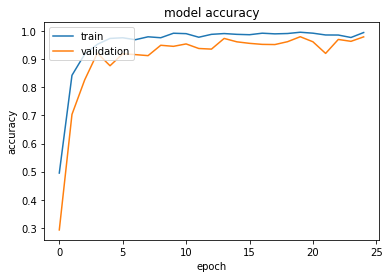

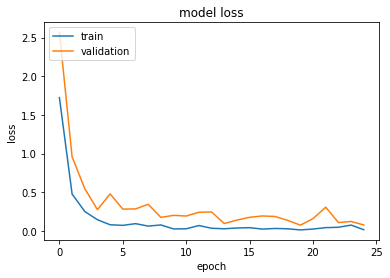

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
results = model1.evaluate(X_val, y_val, batch_size=256)
# results = model.evaluate(X_test, y_test)

25/25 [==============================] - 1s 24ms/step - loss: 0.0764 - accuracy: 0.9799


In [ ]:
Y_pred_rn = np.argmax(model1.predict(X_test), axis=1)

In [ ]:
Y_pred_rn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_rn=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_rn, Y_pred_rn))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        36
           1       0.97      0.95      0.96       454
           2       0.99      1.00      0.99       439
           3       0.98      0.98      0.98       265
           4       1.00      1.00      1.00       421
           5       0.99      1.00      0.99       432
           6       1.00      0.98      0.99       162
           7       0.99      0.99      0.99       117
           8       0.99      0.99      0.99        81
           9       1.00      1.00      1.00       227
          10       0.99      0.98      0.99       246
          11       1.00      0.95      0.98        42
          12       0.98      0.94      0.96       454
          13       1.00      0.89      0.94        57
          14       0.96      0.97      0.96        68
          15       0.93      1.00      0.96        82
          16       0.96      0.98      0.97        94
          17       0.96    

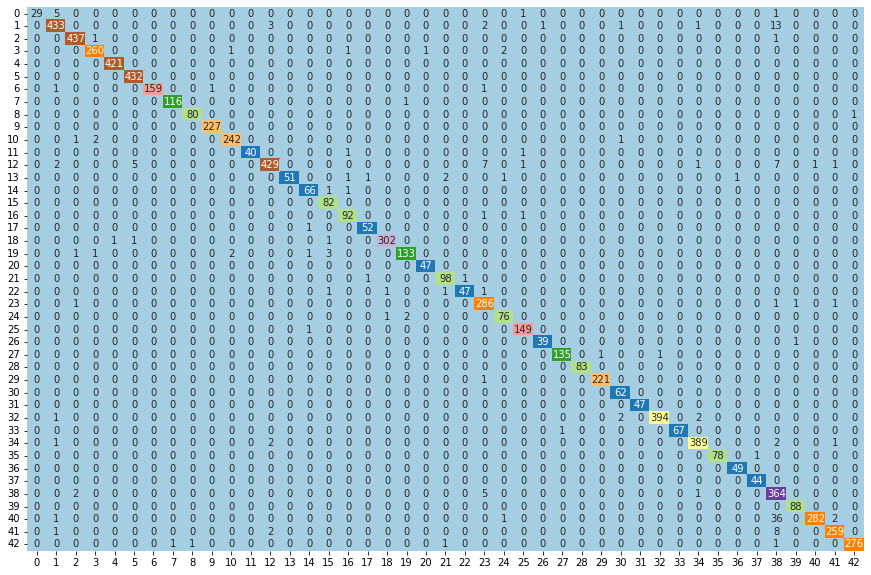

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm2 = metrics.confusion_matrix(y_test_arg_rn, Y_pred_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm2, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
CLASS_ID = df_Traffic['CLASS_ID'].tolist()
classwise_acc = cm2.diagonal()/cm2.sum(axis=1) * 100
imbalanced_ResNet50_152_acc2 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalanced_ResNet50_152_acc2}, columns = ['Class_Label', 'Accuracy'])

In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='pink')

Class_Label,Accuracy
0,80.56
1,95.37
2,99.54
3,98.11
4,100.00
5,100.00
6,98.15
7,99.15
8,98.77
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_rn, Y_pred_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_rn, Y_pred_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.976178
Precision: 0.977586
Recall: 0.976178
F1 score: 0.976294


In [ ]:
mod="imbalanced_ResNet50_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df2 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df2

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_ResNet50_152,0.9761783439490446,0.9775860707355669,0.9761783439490446,0.9762935748213942


In [ ]:
# saving the dataframe
df2.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/imbalanced_resnet50.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model1.save("/content/drive/MyDrive/DBDA_PROJECT/training/imbalanced_RESNET_152.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rn, y_pred = Y_pred_rn, output_dict=True)).transpose()
clsf_report.to_csv('imbalanced_RESNET_152.csv', index= True)

### Model 3- Imbalanced ResNet50 with 50 layers

In [ ]:
# ResNet with 50 layers

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

94683136/94668760 [==============================] - 2s 0us/step


In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model2 = Model(inputs = resnet_preTrained.input, outputs = output)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

#compiling the model
model2.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history2 =  model2.fit(X_train, y_train,  batch_size = 256, validation_data = (X_val, y_val), epochs = n_epochs, verbose = 1)

Epoch 1/25
99/99 [==============================] - 5s 32ms/step - loss: 0.6719 - accuracy: 0.8245 - val_loss: 0.5110 - val_accuracy: 0.8475
Epoch 2/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0541 - accuracy: 0.9846 - val_loss: 0.3590 - val_accuracy: 0.9008
Epoch 3/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0272 - accuracy: 0.9918 - val_loss: 0.1323 - val_accuracy: 0.9576
Epoch 4/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0290 - accuracy: 0.9914 - val_loss: 0.0765 - val_accuracy: 0.9737
Epoch 5/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0077 - accuracy: 0.9980 - val_loss: 0.1079 - val_accuracy: 0.9707
Epoch 6/25
99/99 [==============================] - 3s 27ms/step - loss: 0.0057 - accuracy: 0.9985 - val_loss: 0.1001 - val_accuracy: 0.9740
Epoch 7/25
99/99 [==============================] - 3s 35ms/step - loss: 0.0061 - accuracy: 0.9985 - val_loss: 0.1008 - val_accuracy: 0.9701
Epoch 8/25
99

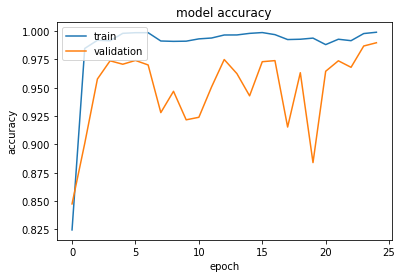

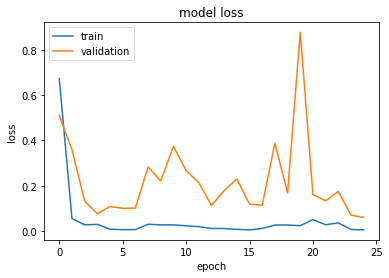

In [ ]:
# summarize history for accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_rs = np.argmax(model2.predict(X_test), axis=1)

In [ ]:
Y_pred_rs

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_rs=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_rs, Y_pred_rs))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        36
           1       0.99      0.98      0.98       454
           2       1.00      1.00      1.00       439
           3       0.98      0.99      0.99       265
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       432
           6       0.98      1.00      0.99       162
           7       0.99      0.96      0.97       117
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       227
          10       0.98      0.99      0.99       246
          11       1.00      1.00      1.00        42
          12       0.99      0.99      0.99       454
          13       0.95      0.98      0.97        57
          14       0.97      0.99      0.98        68
          15       0.99      1.00      0.99        82
          16       0.98      0.94      0.96        94
          17       1.00    

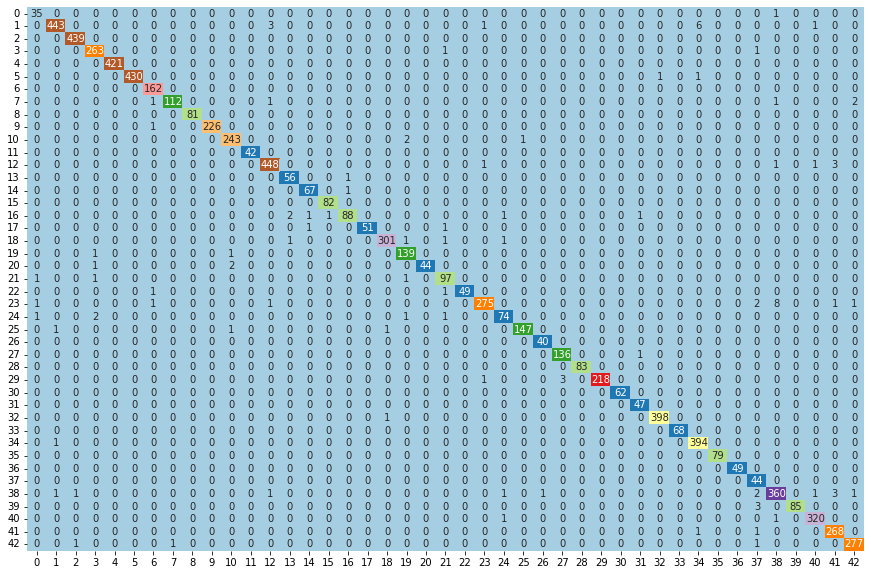

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm3 = metrics.confusion_matrix(y_test_arg_rs, Y_pred_rs)
plt.figure(figsize=(15,10))
sns.heatmap(cm3, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm3.diagonal()/cm3.sum(axis=1) * 100
imbalanced_ResNet_L50_acc3 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': imbalanced_ResNet_L50_acc3}, columns = ['Class_Label', 'Accuracy'])

In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,97.22
1,97.58
2,100.00
3,99.25
4,100.00
5,99.54
6,100.00
7,95.73
8,100.00
9,99.56


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_rs, Y_pred_rs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_rs, Y_pred_rs,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.986369
Precision: 0.986699
Recall: 0.986369
F1 score: 0.986407


In [ ]:
mod="imbalanced_ResNet_L50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df3 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df3

,Model,Accuracy,Precision,Recall,F1 Score
0,imbalanced_ResNet_L50,0.9863694267515923,0.9866988530846018,0.9863694267515923,0.9864070450847467


In [ ]:
# saving the dataframe
df3.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/imbalanced_resnet_L50.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model2.save("/content/drive/MyDrive/DBDA_PROJECT/training/imbalanced_RESNET_L50.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_rs,  y_pred = Y_pred_rs, output_dict=True)).transpose()
clsf_report.to_csv('imbalanced_resnet_L50.csv', index= True)

# **Handel imbalance data**

# 1- using SMOTE: Synthetic Minority Over-sampling Technique


In [ ]:
# SMOTE expected array <= 2, but we have 4 dim so reshaping it.
X1 = X.reshape(39249, 32*32*3, order ='a')

In [ ]:
X1.shape

(39249, 3072)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)

X_smote, y_smote = sm.fit_resample(X1, y)

In [ ]:
X_smote.shape, y_smote.shape

((96750, 3072), (96750, 43))

In [ ]:
X_train_S, X_test_s, y_train_S, y_test_s = train_test_split(X_smote, y_smote, test_size=0.2, random_state=0)

In [ ]:
print("Using SMOTE")
print("X_Train Shape: ",X_train_S.shape,"\nX_test shape: ",X_test_s.shape,"\ny_train shape: ",y_train_S.shape,"\ny_Test Shape : ",y_test_s.shape)

Using SMOTE
X_Train Shape:  (77400, 3072) 
X_test shape:  (19350, 3072) 
y_train shape:  (77400, 43) 
y_Test Shape :  (19350, 43)


In [ ]:
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_train_S, y_train_S, test_size=0.2, random_state=0)

In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_s.shape,"\nX_validation shape: ",X_val_s.shape,"\ny_train shape: ",y_train_s.shape,"\ny_validation Shape : ",y_val_s.shape)

validation split
X_Train Shape:  (61920, 3072) 
X_validation shape:  (15480, 3072) 
y_train shape:  (61920, 43) 
y_validation Shape :  (15480, 43)


In [ ]:
X_val_s.shape,y_val_s.shape,X_train_s.shape, y_train_s.shape

((15480, 3072), (15480, 43), (61920, 3072), (61920, 43))

In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_s = X_train_s.reshape(X_train_s.shape[0],32,32,3)
X_val_s = X_val_s.reshape(X_val_s.shape[0],32,32,3)
X_test_s = X_test_s.reshape(X_test_s.shape[0],32,32,3)

In [ ]:
X_val_s.shape,X_train_s.shape

((15480, 32, 32, 3), (61920, 32, 32, 3))

In [ ]:
# BUILDING A MODEL

## Model 4 - CNN Using SMOTE

In [ ]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [ ]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 dropout_5 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history_sMOTE_CNN = model.fit(X_train_s, y_train_s, batch_size=64, epochs=epochs, validation_data=(X_val_s, y_val_s))

Epoch 1/25
968/968 [==============================] - 7s 7ms/step - loss: 1.9340 - accuracy: 0.4911 - val_loss: 0.4419 - val_accuracy: 0.8977
Epoch 2/25
968/968 [==============================] - 7s 7ms/step - loss: 0.6203 - accuracy: 0.8121 - val_loss: 0.2021 - val_accuracy: 0.9437
Epoch 3/25
968/968 [==============================] - 6s 6ms/step - loss: 0.4668 - accuracy: 0.8557 - val_loss: 0.1349 - val_accuracy: 0.9614
Epoch 4/25
968/968 [==============================] - 7s 7ms/step - loss: 0.3863 - accuracy: 0.8797 - val_loss: 0.1211 - val_accuracy: 0.9681
Epoch 5/25
968/968 [==============================] - 7s 7ms/step - loss: 0.3388 - accuracy: 0.8956 - val_loss: 0.0980 - val_accuracy: 0.9733
Epoch 6/25
968/968 [==============================] - 7s 7ms/step - loss: 0.3027 - accuracy: 0.9069 - val_loss: 0.0904 - val_accuracy: 0.9727
Epoch 7/25
968/968 [==============================] - 6s 7ms/step - loss: 0.2766 - accuracy: 0.9154 - val_loss: 0.0764 - val_accuracy: 0.9755
Epoch 

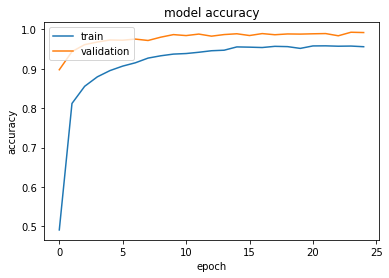

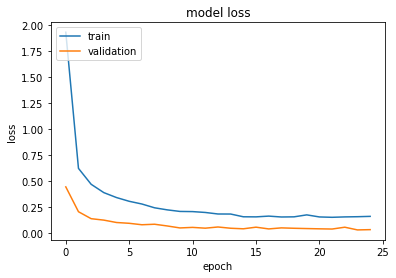

In [ ]:
# summarize history for accuracy
plt.plot(history_sMOTE_CNN.history['accuracy'])
plt.plot(history_sMOTE_CNN.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_sMOTE_CNN.history['loss'])
plt.plot(history_sMOTE_CNN.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_scnn = np.argmax(model.predict(X_test_s), axis=1)

In [ ]:
Y_pred_scnn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_scnn=np.argmax(y_test_s,axis=1)

In [ ]:
print(classification_report(y_test_arg_scnn, Y_pred_scnn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       467
           1       0.98      0.94      0.96       417
           2       0.99      1.00      0.99       462
           3       1.00      0.99      0.99       436
           4       1.00      1.00      1.00       459
           5       0.99      0.99      0.99       443
           6       1.00      1.00      1.00       475
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       467
           9       1.00      1.00      1.00       453
          10       0.99      1.00      0.99       444
          11       1.00      1.00      1.00       438
          12       0.97      0.97      0.97       392
          13       1.00      0.99      0.99       425
          14       1.00      1.00      1.00       466
          15       1.00      1.00      1.00       449
          16       1.00      1.00      1.00       484
          17       1.00    

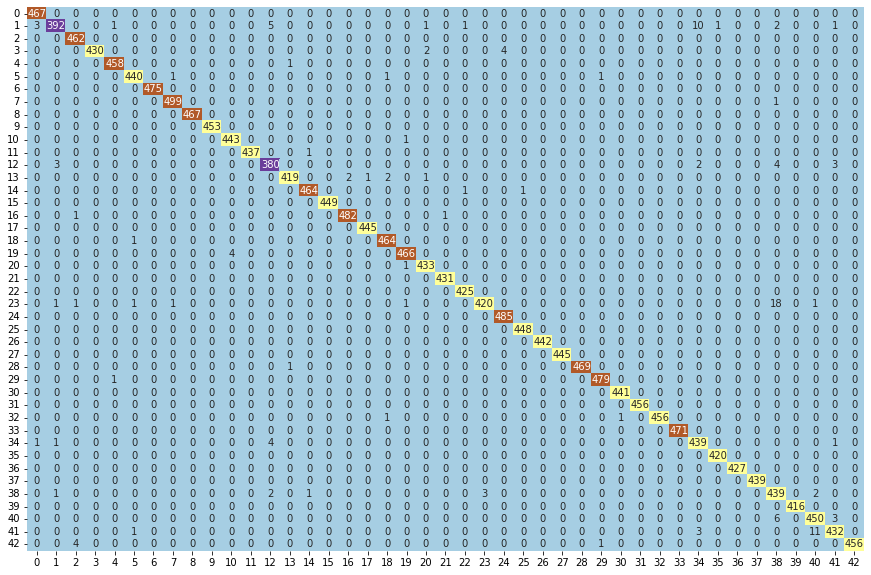

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm4 = metrics.confusion_matrix(y_test_arg_scnn, Y_pred_scnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm4, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm4.diagonal()/cm4.sum(axis=1) * 100

In [ ]:
balanced_SMOTE_CNN_acc4 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_CNN_acc4}, columns = ['Class_Label', 'Accuracy'])


In [ ]:
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,100.00
1,94.00
2,100.00
3,98.62
4,99.78
5,99.32
6,100.00
7,99.80
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_scnn, Y_pred_scnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_scnn, Y_pred_scnn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.992817
Precision: 0.992894
Recall: 0.992817
F1 score: 0.992809


In [ ]:
mod="balanced_SMOTE_CNN"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df4 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df4

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_CNN,0.9928165374677003,0.9928944143296432,0.9928165374677003,0.9928091115700866


In [ ]:
# saving the dataframe
df4.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_CNN.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_CNN.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_scnn,  y_pred = Y_pred_scnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_SMOTE_CNN.csv', index= True)

## Model 5 - ResNet50 152 layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model5 = Model(inputs = resnet_preTrained.input, outputs = output)
model5.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model5.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history5 =  model5.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 24s 84ms/step - loss: 0.7954 - accuracy: 0.7691 - val_loss: 0.4158 - val_accuracy: 0.8682
Epoch 2/25
242/242 [==============================] - 17s 70ms/step - loss: 0.1312 - accuracy: 0.9580 - val_loss: 0.3624 - val_accuracy: 0.8981
Epoch 3/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0697 - accuracy: 0.9779 - val_loss: 0.2345 - val_accuracy: 0.9355
Epoch 4/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0543 - accuracy: 0.9830 - val_loss: 0.3920 - val_accuracy: 0.9083
Epoch 5/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0429 - accuracy: 0.9861 - val_loss: 0.1813 - val_accuracy: 0.9505
Epoch 6/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0337 - accuracy: 0.9890 - val_loss: 0.0871 - val_accuracy: 0.9743
Epoch 7/25
242/242 [==============================] - 17s 69ms/step - loss: 0.0290 - accuracy: 0.9908 - val_loss: 0.1233 - val_accuracy:

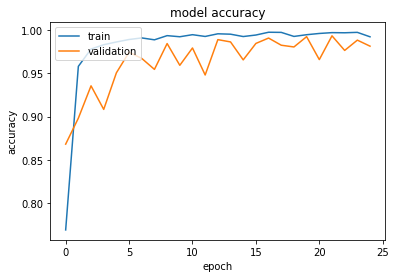

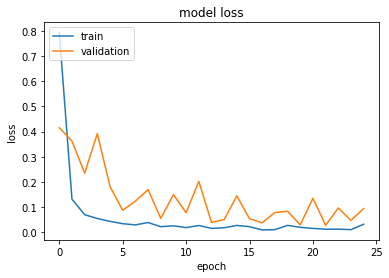

In [ ]:
# summarize history for accuracy
plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_SM_rn = np.argmax(model5.predict(X_test_s), axis=1)

In [ ]:
Y_pred_SM_rn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_SM_rn=np.argmax(y_test_s,axis=1)

In [ ]:
print(classification_report(y_test_arg_SM_rn, Y_pred_SM_rn))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       467
           1       0.92      0.98      0.95       417
           2       1.00      0.99      0.99       462
           3       1.00      0.97      0.98       436
           4       1.00      0.99      1.00       459
           5       0.99      0.98      0.99       443
           6       0.99      1.00      1.00       475
           7       1.00      0.98      0.99       500
           8       1.00      1.00      1.00       467
           9       1.00      1.00      1.00       453
          10       1.00      0.97      0.98       444
          11       1.00      0.98      0.99       438
          12       1.00      0.86      0.92       392
          13       1.00      0.96      0.98       425
          14       0.97      1.00      0.99       466
          15       0.88      1.00      0.94       449
          16       0.98      0.98      0.98       484
          17       1.00    

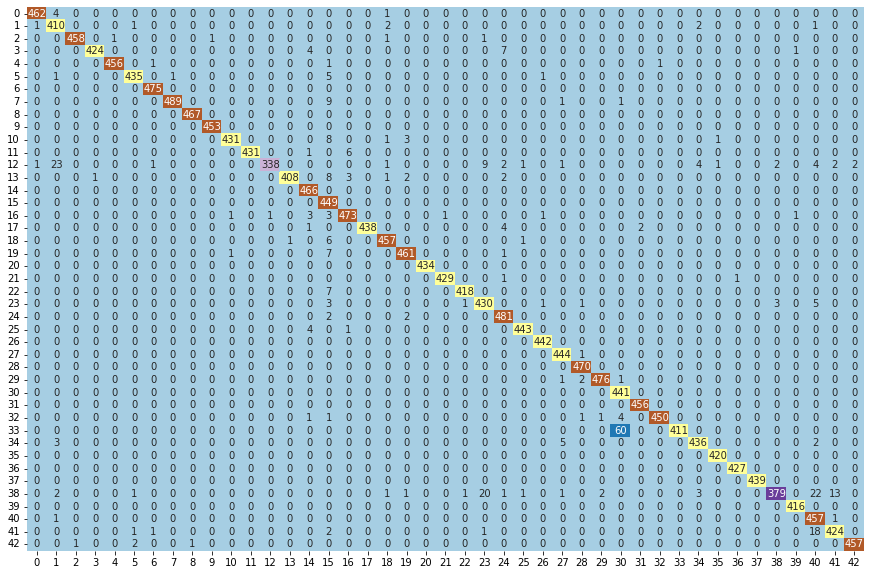

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm5 = metrics.confusion_matrix(y_test_arg_SM_rn, Y_pred_SM_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm5, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm5.diagonal()/cm5.sum(axis=1) * 100
balanced_SMOTE_ResNet_152_acc5 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_ResNet_152_acc5}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='blue')

Class_Label,Accuracy
0,98.93
1,98.32
2,99.13
3,97.25
4,99.35
5,98.19
6,100.00
7,97.80
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_SM_rn, Y_pred_SM_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_SM_rn, Y_pred_SM_rn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.979897
Precision: 0.981140
Recall: 0.979897
F1 score: 0.979868


In [ ]:
mod="balanced_SMOTE_ResNet_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df5 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df5

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_ResNet_152,0.9798966408268733,0.9811403095441085,0.9798966408268733,0.9798675128155517


In [ ]:
# saving the dataframe
df5.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_ResNet_152.csv',encoding = 'utf-8-sig')

In [ ]:
# Saving the model
model5.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_ResNet_152.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SM_rn,  y_pred =  Y_pred_SM_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_SMOTE_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer 

## Model 6- ResNet50 50 Layer using SMOTE

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:

#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model6 = Model(inputs = resnet_preTrained.input, outputs = output)
model6.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model6.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#training the model
n_epochs = 25
history6 =  model6.fit(X_train_s, y_train_s,  batch_size = 256, validation_data = (X_val_s, y_val_s), epochs = n_epochs, verbose = 1)


Epoch 1/25
242/242 [==============================] - 8s 29ms/step - loss: 0.2807 - accuracy: 0.9267 - val_loss: 0.1237 - val_accuracy: 0.9615
Epoch 2/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0251 - accuracy: 0.9924 - val_loss: 0.2014 - val_accuracy: 0.9401
Epoch 3/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0201 - accuracy: 0.9936 - val_loss: 0.2777 - val_accuracy: 0.9210
Epoch 4/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0157 - accuracy: 0.9952 - val_loss: 0.0812 - val_accuracy: 0.9778
Epoch 5/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.4908 - val_accuracy: 0.9033
Epoch 6/25
242/242 [==============================] - 6s 27ms/step - loss: 0.0217 - accuracy: 0.9936 - val_loss: 0.1060 - val_accuracy: 0.9687
Epoch 7/25
242/242 [==============================] - 7s 27ms/step - loss: 0.0094 - accuracy: 0.9972 - val_loss: 0.0514 - val_accuracy: 0.9868

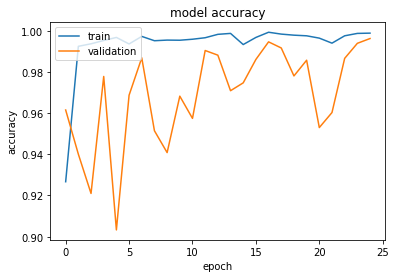

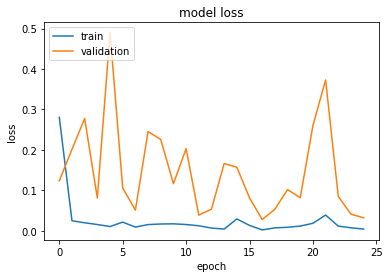

In [ ]:
# summarize history for accuracy
plt.plot(history6.history['accuracy'])
plt.plot(history6.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history6.history['loss'])
plt.plot(history6.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_SMT_rn = np.argmax(model6.predict(X_test_s), axis=1)


In [ ]:
Y_pred_SMT_rn

array([10, 18, 28, ..., 22, 20, 22])

In [ ]:
y_test_arg_SMT_rn=np.argmax(y_test_s,axis=1)


In [ ]:
print(classification_report(y_test_arg_SMT_rn, Y_pred_SMT_rn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       467
           1       0.99      0.97      0.98       417
           2       1.00      1.00      1.00       462
           3       0.99      1.00      1.00       436
           4       1.00      1.00      1.00       459
           5       1.00      1.00      1.00       443
           6       1.00      1.00      1.00       475
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       467
           9       1.00      1.00      1.00       453
          10       1.00      0.99      1.00       444
          11       1.00      1.00      1.00       438
          12       0.99      0.98      0.98       392
          13       1.00      1.00      1.00       425
          14       1.00      1.00      1.00       466
          15       1.00      1.00      1.00       449
          16       1.00      1.00      1.00       484
          17       1.00    

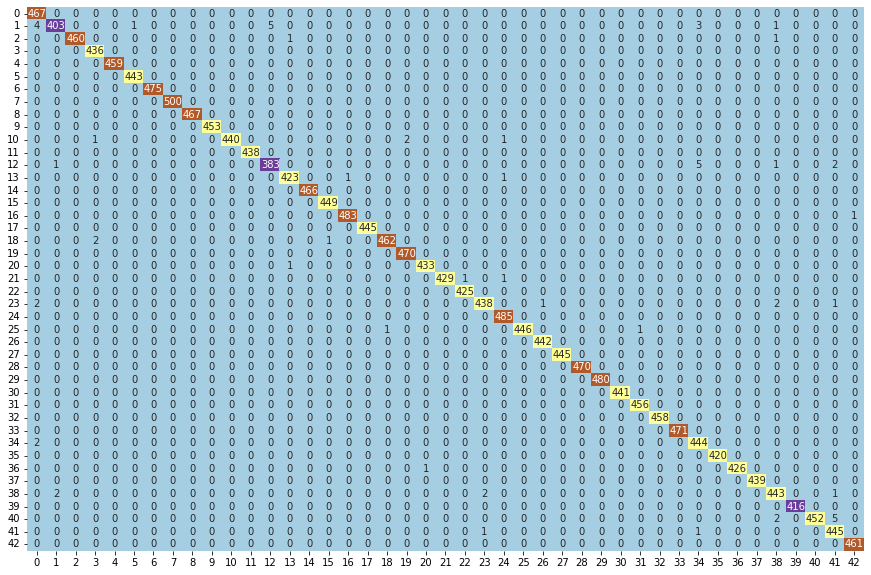

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm6 = metrics.confusion_matrix(y_test_arg_SMT_rn, Y_pred_SMT_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm6, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm6.diagonal()/cm6.sum(axis=1) * 100
balanced_SMOTE_ResNet_50_acc6 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_SMOTE_ResNet_50_acc6}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,100.00
1,96.64
2,99.57
3,100.00
4,100.00
5,100.00
6,100.00
7,100.00
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_SMT_rn, Y_pred_SMT_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_SMT_rn, Y_pred_SMT_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.996744
Precision: 0.996762
Recall: 0.996744
F1 score: 0.996741


In [ ]:
mod="balanced_SMOTE_ResNet_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df6 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df6

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_SMOTE_ResNet_50,0.9967441860465116,0.996762117962579,0.9967441860465116,0.9967408687046833


In [ ]:
# saving the dataframe
df6.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model6.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_SMOTE_ResNet_50.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_SMT_rn,  y_pred =   Y_pred_SMT_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_SMOTE_ResNet_50.csv', index= True)

# **Handeling imbalanced data**

### 2) Weighted class approch

In [ ]:
# dataset prepration

In [ ]:
# X_train, X_val, y_train, y_val = imbalanced dataset

In [ ]:
from sklearn.utils import class_weight


In [ ]:
cls_wt = class_weight.compute_class_weight('balanced', 
                                           classes=np.unique(np.argmax(y_train, axis=1)), 
                                           y=np.argmax(y_train, axis=1))



In [ ]:
class_weight_dict = dict(enumerate(cls_wt))

In [ ]:
class_weight_dict


{0: 4.233063700707786,
 1: 0.4217781882293678,
 2: 0.46958423689523665,
 3: 0.7029636470489463,
 4: 0.4333551859775033,
 5: 0.42330637007077854,
 6: 1.1801268498942918,
 7: 1.4178708512079476,
 8: 2.2554547903385114,
 9: 0.8453875408070541,
 10: 0.7518182634461704,
 11: 4.263961975895434,
 12: 0.409651325874947,
 13: 2.318106312292359,
 14: 2.6919944271782232,
 15: 2.3554951237809454,
 16: 1.7489903913104023,
 17: 3.540380549682875,
 18: 0.6016094651881302,
 19: 1.5495034236012584,
 20: 3.7207821063546143,
 21: 1.6834662556128945,
 22: 3.416156670746634,
 23: 0.6469133894769373,
 24: 1.8843960990247561,
 25: 1.1409429505813953,
 26: 3.3766635300443606,
 27: 1.3246321784527764,
 28: 2.131980987947717,
 29: 0.7403837651428066,
 30: 2.2296289721285283,
 31: 4.425475687103594,
 32: 0.4327131782945736,
 33: 3.227418733136323,
 34: 0.45960880464018444,
 35: 2.5734043643069358,
 36: 3.628340314892388,
 37: 3.894418604651163,
 38: 0.4946340310733907,
 39: 2.1961007169085502,
 40: 0.64691338947

## Model 7- CNN with weight-class approch

In [ ]:
model7 = Sequential()
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model7.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model7.add(MaxPool2D(pool_size=(2, 2)))
model7.add(Dropout(rate=0.25))
model7.add(Flatten())
model7.add(Dense(256, activation='relu'))
model7.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model7.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model7.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model7.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_9 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history7 = model7.fit(X_train, y_train,class_weight=class_weight_dict, batch_size=64, epochs=epochs, validation_data=(X_val, y_val))


Epoch 1/25
393/393 [==============================] - 4s 8ms/step - loss: 4.0338 - accuracy: 0.0158 - val_loss: 3.7608 - val_accuracy: 0.0199
Epoch 2/25
393/393 [==============================] - 3s 7ms/step - loss: 3.4789 - accuracy: 0.0858 - val_loss: 2.0690 - val_accuracy: 0.4161
Epoch 3/25
393/393 [==============================] - 3s 7ms/step - loss: 1.7102 - accuracy: 0.4987 - val_loss: 0.9110 - val_accuracy: 0.7583
Epoch 4/25
393/393 [==============================] - 3s 7ms/step - loss: 1.1453 - accuracy: 0.6443 - val_loss: 0.5762 - val_accuracy: 0.8449
Epoch 5/25
393/393 [==============================] - 3s 7ms/step - loss: 0.9308 - accuracy: 0.7042 - val_loss: 0.5215 - val_accuracy: 0.8580
Epoch 6/25
393/393 [==============================] - 3s 7ms/step - loss: 0.8251 - accuracy: 0.7291 - val_loss: 0.5654 - val_accuracy: 0.8376
Epoch 7/25
393/393 [==============================] - 3s 7ms/step - loss: 0.7274 - accuracy: 0.7557 - val_loss: 0.3721 - val_accuracy: 0.8914
Epoch 

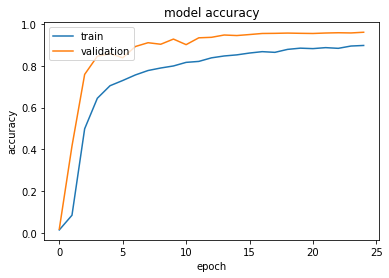

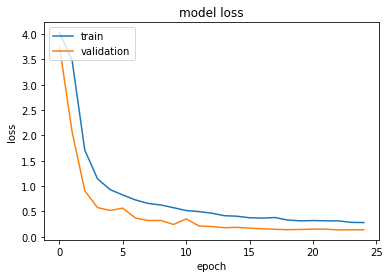

In [ ]:
# summarize history for accuracy
plt.plot(history7.history['accuracy'])
plt.plot(history7.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history7.history['loss'])
plt.plot(history7.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_wt_cnn = np.argmax(model7.predict(X_test), axis=1)


In [ ]:
Y_pred_wt_cnn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg_wt_cnn=np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn))

0.9610191082802548


In [ ]:
from sklearn.metrics import classification_report


In [ ]:
print(classification_report(y_test_arg_wt_cnn, Y_pred_wt_cnn))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        36
           1       0.92      0.91      0.92       454
           2       0.98      0.99      0.99       439
           3       1.00      0.86      0.93       265
           4       0.99      0.99      0.99       421
           5       1.00      1.00      1.00       432
           6       0.96      1.00      0.98       162
           7       0.97      0.96      0.96       117
           8       1.00      0.98      0.99        81
           9       1.00      0.98      0.99       227
          10       1.00      0.95      0.97       246
          11       0.89      0.98      0.93        42
          12       0.90      0.94      0.92       454
          13       0.95      0.96      0.96        57
          14       0.93      0.82      0.87        68
          15       1.00      1.00      1.00        82
          16       0.97      0.97      0.97        94
          17       0.93    

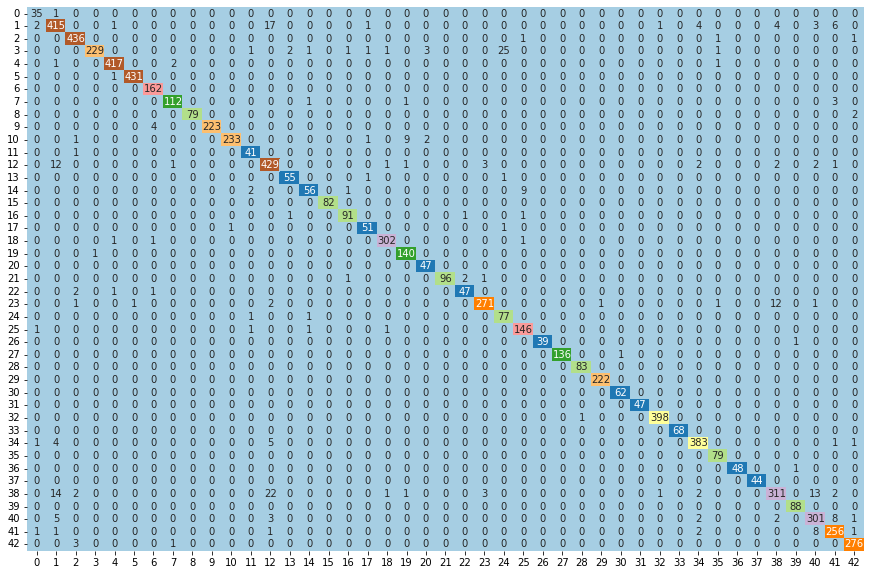

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm7 = metrics.confusion_matrix(y_test_arg_wt_cnn, Y_pred_wt_cnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm7, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm7.diagonal()/cm7.sum(axis=1) * 100
balanced_WT_cnn_acc7 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_WT_cnn_acc7}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,97.22
1,91.41
2,99.32
3,86.42
4,99.05
5,99.77
6,100.00
7,95.73
8,97.53
9,98.24


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_cnn, Y_pred_wt_cnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_cnn, Y_pred_wt_cnn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.961019
Precision: 0.962321
Recall: 0.961019
F1 score: 0.960991


In [ ]:
mod="balanced_WT_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df7 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df7


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_WT_cnn,0.9610191082802548,0.9623210197431471,0.9610191082802548,0.9609911262403996


In [ ]:
# saving the dataframe
df7.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_WT_cnn.csv',encoding = 'utf-8-sig')



In [ ]:
# Saving the model
model7.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_WT_cnn.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_cnn,  y_pred =   Y_pred_wt_cnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_WT_cnn.csv', index= True)

# **Model 8-ResNet 152 layer weight-class approch**

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)

In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model8 = Model(inputs = resnet_preTrained.input, outputs = output)
model8.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_5[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model8.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 25
history8 =  model8.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)


Epoch 1/25
105/105 [==============================] - 14s 88ms/step - loss: 2.1639 - accuracy: 0.3374 - val_loss: 3.0950 - val_accuracy: 0.1338
Epoch 2/25
105/105 [==============================] - 7s 67ms/step - loss: 0.5867 - accuracy: 0.7611 - val_loss: 1.1631 - val_accuracy: 0.6624
Epoch 3/25
105/105 [==============================] - 7s 68ms/step - loss: 0.2462 - accuracy: 0.8903 - val_loss: 0.7000 - val_accuracy: 0.7843
Epoch 4/25
105/105 [==============================] - 7s 68ms/step - loss: 0.1894 - accuracy: 0.9147 - val_loss: 0.4618 - val_accuracy: 0.8628
Epoch 5/25
105/105 [==============================] - 7s 68ms/step - loss: 0.1511 - accuracy: 0.9360 - val_loss: 0.6272 - val_accuracy: 0.8191
Epoch 6/25
105/105 [==============================] - 7s 70ms/step - loss: 0.0890 - accuracy: 0.9586 - val_loss: 0.3970 - val_accuracy: 0.8866
Epoch 7/25
105/105 [==============================] - 7s 67ms/step - loss: 0.0476 - accuracy: 0.9760 - val_loss: 0.2102 - val_accuracy: 0.938

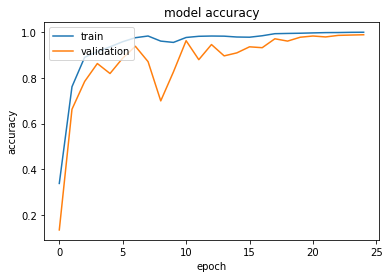

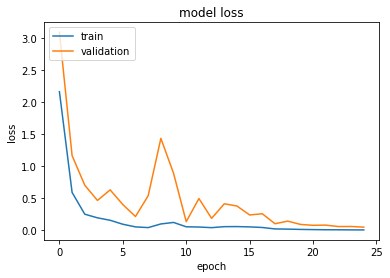

In [ ]:
# summarize history for accuracy
plt.plot(history8.history['accuracy'])
plt.plot(history8.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history8.history['loss'])
plt.plot(history8.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:

Y_pred_wt_rn = np.argmax(model8.predict(X_test), axis=1)

In [ ]:
Y_pred_wt_rn

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_wt_rn=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_wt_rn, Y_pred_wt_rn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.99      0.98      0.99       454
           2       1.00      0.99      0.99       439
           3       0.98      0.98      0.98       265
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       432
           6       1.00      0.99      1.00       162
           7       1.00      0.99      1.00       117
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       227
          10       1.00      0.98      0.99       246
          11       1.00      1.00      1.00        42
          12       0.99      0.96      0.97       454
          13       0.98      0.95      0.96        57
          14       0.99      1.00      0.99        68
          15       1.00      1.00      1.00        82
          16       0.99      1.00      0.99        94
          17       1.00    

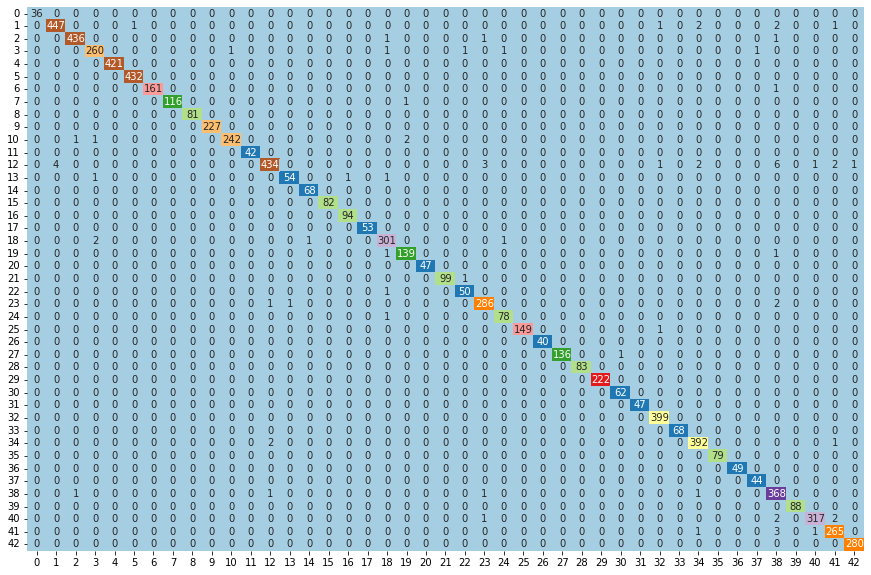

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm8 = metrics.confusion_matrix(y_test_arg_wt_rn, Y_pred_wt_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm8, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm8.diagonal()/cm8.sum(axis=1) * 100
balanced_wt_ResNet_152_acc8 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_wt_ResNet_152_acc8}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='green')

Class_Label,Accuracy
0,100.00
1,98.46
2,99.32
3,98.11
4,100.00
5,100.00
6,99.38
7,99.15
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_rn, Y_pred_wt_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_rn, Y_pred_wt_rn,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.990318
Precision: 0.990410
Recall: 0.990318
F1 score: 0.990318


In [ ]:
mod="balanced_wt_ResNet_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df8 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df8

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_wt_ResNet_152,0.9903184713375797,0.9904097320645775,0.9903184713375797,0.9903181823471249


In [ ]:
# saving the dataframe
df8.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_wt_ResNet_152.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model8.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_wt_ResNet_152.h5")

In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn,   y_pred =  Y_pred_wt_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_wt_ResNet_152.csv', index= True)

In [ ]:
# ResNet with 50 layer and imagenet weight

# Model 9- ResNet with 50 layer and weighted-class approch

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)

In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model9 = Model(inputs = resnet_preTrained.input, outputs = output)
model9.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_6[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)

In [ ]:
#compiling the model
model9.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#training the model
n_epochs = 35
history9 =  model9.fit(X_train_m, y_train_m,class_weight=class_weight_dict, batch_size = 256, validation_split = 0.15, epochs = n_epochs, verbose = 1)

Epoch 1/35
105/105 [==============================] - 5s 30ms/step - loss: 0.7093 - accuracy: 0.7970 - val_loss: 0.6809 - val_accuracy: 0.8276
Epoch 2/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0500 - accuracy: 0.9774 - val_loss: 0.2141 - val_accuracy: 0.9340
Epoch 3/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0298 - accuracy: 0.9877 - val_loss: 0.2467 - val_accuracy: 0.9229
Epoch 4/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0368 - accuracy: 0.9867 - val_loss: 0.5010 - val_accuracy: 0.8934
Epoch 5/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0432 - accuracy: 0.9828 - val_loss: 0.2238 - val_accuracy: 0.9346
Epoch 6/35
105/105 [==============================] - 3s 28ms/step - loss: 0.0142 - accuracy: 0.9927 - val_loss: 0.1481 - val_accuracy: 0.9582
Epoch 7/35
105/105 [==============================] - 3s 26ms/step - loss: 0.0177 - accuracy: 0.9927 - val_loss: 0.1035 - val_accuracy: 0.9743

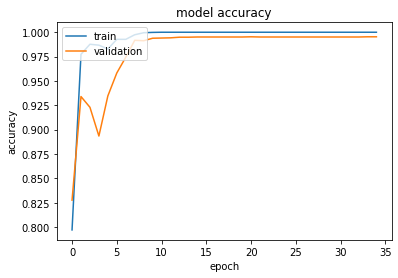

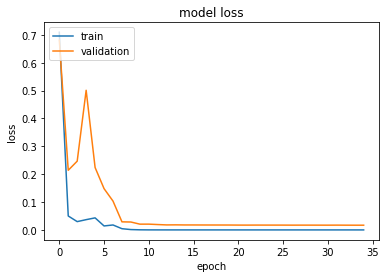

In [ ]:
# summarize history for accuracy
plt.plot(history9.history['accuracy'])
plt.plot(history9.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history9.history['loss'])
plt.plot(history9.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
Y_pred_wt_rn50 = np.argmax(model9.predict(X_test), axis=1)

In [ ]:
Y_pred_wt_rn50

array([23, 25, 27, ..., 23, 41,  9])

In [ ]:
y_test_arg_wt_rn50=np.argmax(y_test,axis=1)

In [ ]:
print(classification_report(y_test_arg_wt_rn50, Y_pred_wt_rn50))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.99      0.98      0.99       454
           2       1.00      1.00      1.00       439
           3       1.00      0.98      0.99       265
           4       1.00      1.00      1.00       421
           5       1.00      1.00      1.00       432
           6       0.99      1.00      1.00       162
           7       1.00      0.99      1.00       117
           8       1.00      1.00      1.00        81
           9       1.00      1.00      1.00       227
          10       1.00      1.00      1.00       246
          11       0.98      1.00      0.99        42
          12       0.99      1.00      0.99       454
          13       0.96      0.96      0.96        57
          14       1.00      0.97      0.99        68
          15       1.00      1.00      1.00        82
          16       0.99      0.99      0.99        94
          17       1.00    

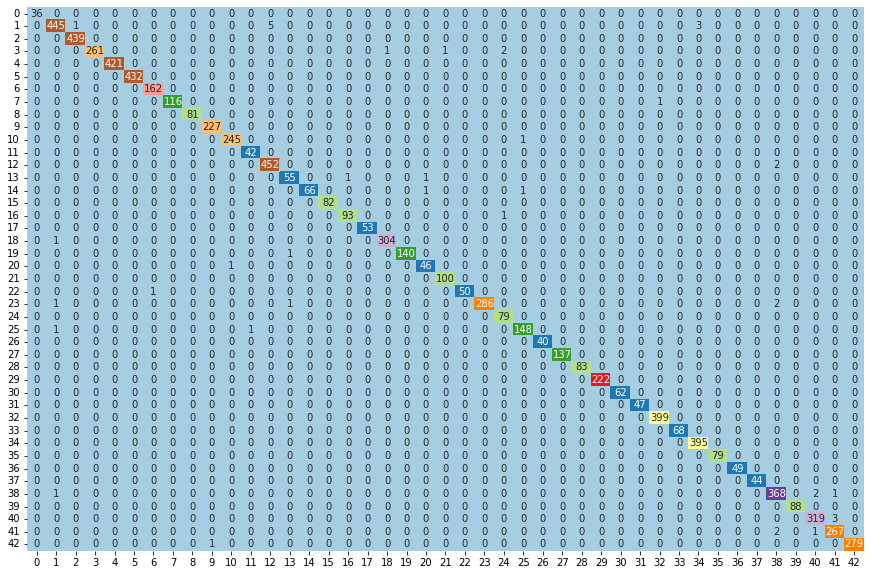

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm9 = metrics.confusion_matrix(y_test_arg_wt_rn50, Y_pred_wt_rn50)
plt.figure(figsize=(15,10))
sns.heatmap(cm9, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()

In [ ]:
classwise_acc = cm9.diagonal()/cm9.sum(axis=1) * 100
balanced_wt_ResNet_50_acc9 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_wt_ResNet_50_acc9}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,100.00
1,98.02
2,100.00
3,98.49
4,100.00
5,100.00
6,100.00
7,99.15
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_wt_rn50, Y_pred_wt_rn50)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_wt_rn50, Y_pred_wt_rn50,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.994522
Precision: 0.994555
Recall: 0.994522
F1 score: 0.994523


In [ ]:

mod="balanced_wt_ResNet_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df9 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df9

,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_wt_ResNet_50,0.9945222929936306,0.9945551097237557,0.9945222929936306,0.9945227046736825


In [ ]:
# saving the dataframe
df9.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_wt_ResNet_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model9.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_wt_ResNet_50.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_wt_rn50,   y_pred =   Y_pred_wt_rn50, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_wt_ResNet_50.csv', index= True)

## **Handel imbalanced data**

## 3) TOMEK LINKS under-sampling

In [ ]:
# tomek undersampling

In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
# Array Estimator expected <= 2. but Found array with dim 4.
# reshaping x
X2 = X.reshape(39249, 32*32*3, order ='a')
X2.shape


(39249, 3072)

In [ ]:

undersample = TomekLinks()
X_t, y_t = undersample.fit_resample(X2, y)

In [ ]:
X_t.shape, y_t.shape


((39187, 3072), (39187, 43))

In [ ]:
X_train_tm, X_test_t, y_train_tm, y_test_t = train_test_split(X_t, y_t, test_size=0.2, random_state=0)


In [ ]:
print("Using TOMEK")
print("X_Train Shape: ",X_train_tm.shape,"\nX_test shape: ",X_test_t.shape,"\ny_train shape: ",y_train_tm.shape,"\ny_Test Shape : ",y_test_t.shape)


Using TOMEK
X_Train Shape:  (31349, 3072) 
X_test shape:  (7838, 3072) 
y_train shape:  (31349, 43) 
y_Test Shape :  (7838, 43)


In [ ]:
X_train_t, X_val_t, y_train_t, y_val_t = train_test_split(X_train_tm, y_train_tm, test_size=0.2, random_state=0)


In [ ]:
print("validation split")
print("X_Train Shape: ",X_train_t.shape,"\nX_validation shape: ",X_val_t.shape,"\ny_train shape: ",y_train_t.shape,"\ny_validation Shape : ",y_val_t.shape)


validation split
X_Train Shape:  (25079, 3072) 
X_validation shape:  (6270, 3072) 
y_train shape:  (25079, 43) 
y_validation Shape :  (6270, 43)


In [ ]:
# cnn expecting 4 dim, so again reshape to orignal
X_train_t = X_train_t.reshape(X_train_t.shape[0],32,32,3)
X_val_t = X_val_t.reshape(X_val_t.shape[0],32,32,3)
X_test_t = X_test_t.reshape(X_test_t.shape[0],32,32,3)


In [ ]:
# X_train_tm = X_train_tm.reshape(X_train_tm.shape[0],32,32,3)


## Model 10- CNN TOMEK

In [ ]:
# Building a model

In [ ]:
model10 = Sequential()
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model10.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model10.add(MaxPool2D(pool_size=(2, 2)))
model10.add(Dropout(rate=0.25))
model10.add(Flatten())
model10.add(Dense(256, activation='relu'))
model10.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model10.add(Dense(43, activation='softmax'))


In [ ]:
#Compilation of the model
model10.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
model10.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 conv2d_13 (Conv2D)          (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 10, 64)        18496     
                                                                 
 conv2d_15 (Conv2D)          (None, 8, 8, 64)          36928     
                                                      

In [ ]:
epochs = 25
history10 = model10.fit(X_train_t, y_train_t, batch_size=64, epochs=epochs, validation_data=(X_val_t, y_val_t))


Epoch 1/25
392/392 [==============================] - 4s 8ms/step - loss: 2.4740 - accuracy: 0.3914 - val_loss: 0.8484 - val_accuracy: 0.7901
Epoch 2/25
392/392 [==============================] - 3s 7ms/step - loss: 0.9223 - accuracy: 0.7217 - val_loss: 0.3741 - val_accuracy: 0.9096
Epoch 3/25
392/392 [==============================] - 2s 6ms/step - loss: 0.6452 - accuracy: 0.8030 - val_loss: 0.2489 - val_accuracy: 0.9279
Epoch 4/25
392/392 [==============================] - 3s 6ms/step - loss: 0.5329 - accuracy: 0.8347 - val_loss: 0.2046 - val_accuracy: 0.9407
Epoch 5/25
392/392 [==============================] - 3s 6ms/step - loss: 0.4642 - accuracy: 0.8583 - val_loss: 0.1903 - val_accuracy: 0.9370
Epoch 6/25
392/392 [==============================] - 3s 6ms/step - loss: 0.4125 - accuracy: 0.8702 - val_loss: 0.1912 - val_accuracy: 0.9400
Epoch 7/25
392/392 [==============================] - 3s 6ms/step - loss: 0.3870 - accuracy: 0.8802 - val_loss: 0.1265 - val_accuracy: 0.9636
Epoch 

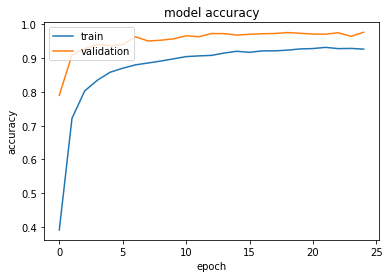

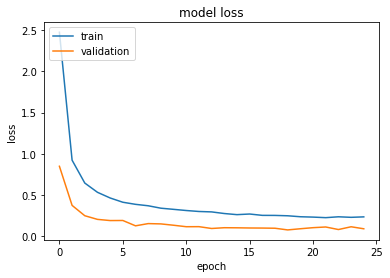

In [ ]:
# summarize history for accuracy
plt.plot(history10.history['accuracy'])
plt.plot(history10.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history10.history['loss'])
plt.plot(history10.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_cnn = np.argmax(model10.predict(X_test_t), axis=1)


In [ ]:
Y_pred_tk_cnn

array([12,  5, 18, ...,  3, 22, 38])

In [ ]:
# Classification metrics can't handle a mix of multilabel-indicator and multiclass targets
y_test_arg_tk_cnn=np.argmax(y_test_t,axis=1)


In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn))


0.9766522071957132


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test_arg_tk_cnn, Y_pred_tk_cnn))


              precision    recall  f1-score   support

           0       1.00      0.87      0.93        46
           1       0.97      0.93      0.95       475
           2       0.99      1.00      1.00       404
           3       0.99      0.98      0.99       257
           4       0.99      1.00      0.99       409
           5       0.99      1.00      0.99       409
           6       1.00      1.00      1.00       169
           7       0.97      1.00      0.98       119
           8       1.00      1.00      1.00        88
           9       1.00      1.00      1.00       241
          10       0.97      1.00      0.98       249
          11       0.97      1.00      0.99        34
          12       0.91      0.96      0.94       444
          13       0.97      0.88      0.93        77
          14       0.95      0.95      0.95        63
          15       1.00      1.00      1.00        91
          16       0.98      0.99      0.98        93
          17       0.98    

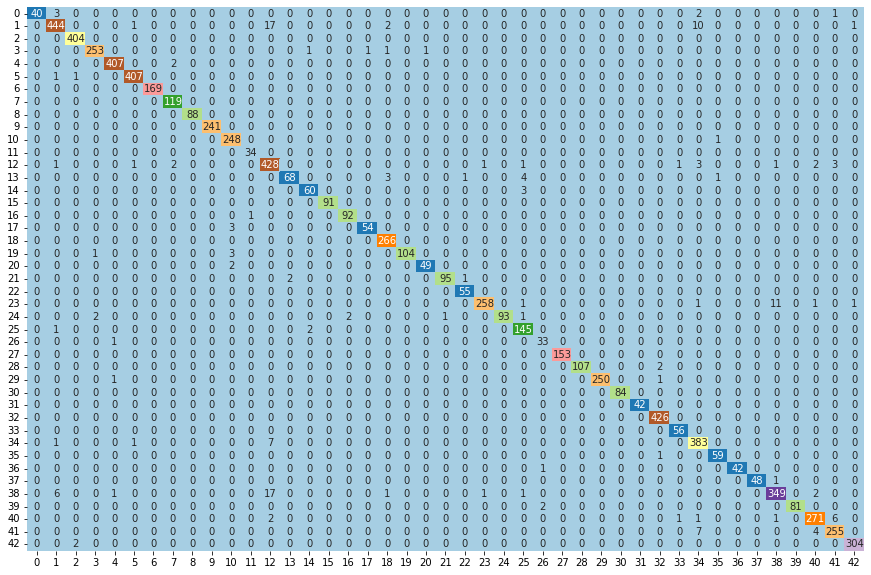

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm10 = metrics.confusion_matrix(y_test_arg_tk_cnn, Y_pred_tk_cnn)
plt.figure(figsize=(15,10))
sns.heatmap(cm10, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm10.diagonal()/cm10.sum(axis=1) * 100
balanced_tk_cnn_acc10 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_cnn_acc10}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='orange')

Class_Label,Accuracy
0,86.96
1,93.47
2,100.00
3,98.44
4,99.51
5,99.51
6,100.00
7,100.00
8,100.00
9,100.00


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_cnn, Y_pred_tk_cnn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_cnn, Y_pred_tk_cnn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.976652
Precision: 0.977076
Recall: 0.976652
F1 score: 0.976628


In [ ]:
mod="balanced_tk_cnn"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df10 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df10


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_cnn,0.9766522071957132,0.9770761449851955,0.9766522071957132,0.9766275315171271


In [ ]:
# saving the dataframe
df10.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_cnn.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model10.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_cnn.h5")


In [ ]:

clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_cnn, y_pred =  Y_pred_tk_cnn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_tk_cnn.csv', index= True)



## Model 11 - ResNet50 with 152 layer-TOMEK

In [ ]:
# Resnet 152

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights=None,
    input_shape=(32,32, 3),
)


In [ ]:
#taking 152th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[152].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model11 = Model(inputs = resnet_preTrained.input, outputs = output)
model11.summary()


Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:

#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model11.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:

#training the model
n_epochs = 25
history11 =  model11.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 14s 104ms/step - loss: 1.7314 - accuracy: 0.4951 - val_loss: 2.4103 - val_accuracy: 0.3159
Epoch 2/25
98/98 [==============================] - 7s 70ms/step - loss: 0.4821 - accuracy: 0.8431 - val_loss: 1.2957 - val_accuracy: 0.6244
Epoch 3/25
98/98 [==============================] - 7s 70ms/step - loss: 0.2255 - accuracy: 0.9282 - val_loss: 0.5558 - val_accuracy: 0.8348
Epoch 4/25
98/98 [==============================] - 7s 71ms/step - loss: 0.1265 - accuracy: 0.9600 - val_loss: 0.7975 - val_accuracy: 0.7767
Epoch 5/25
98/98 [==============================] - 7s 70ms/step - loss: 0.1144 - accuracy: 0.9619 - val_loss: 0.7388 - val_accuracy: 0.8137
Epoch 6/25
98/98 [==============================] - 7s 70ms/step - loss: 0.0838 - accuracy: 0.9734 - val_loss: 0.3629 - val_accuracy: 0.9040
Epoch 7/25
98/98 [==============================] - 7s 69ms/step - loss: 0.0635 - accuracy: 0.9791 - val_loss: 0.2502 - val_accuracy: 0.9270
Epoch 8/25


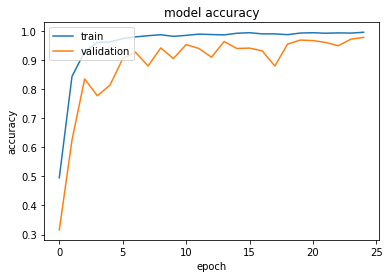

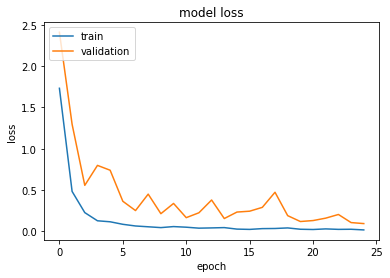

In [ ]:
# summarize history for accuracy
plt.plot(history11.history['accuracy'])
plt.plot(history11.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history11.history['loss'])
plt.plot(history11.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rn = np.argmax(model11.predict(X_test_t), axis=1)


In [ ]:
Y_pred_tk_rn


array([34,  5, 22, ...,  3, 22, 38])

In [ ]:
y_test_arg_tk_rn=np.argmax(y_test_t,axis=1)


In [ ]:
print(classification_report(y_test_arg_tk_rn, Y_pred_tk_rn))


              precision    recall  f1-score   support

           0       0.98      0.96      0.97        46
           1       1.00      0.93      0.97       475
           2       1.00      1.00      1.00       404
           3       1.00      0.98      0.99       257
           4       1.00      1.00      1.00       409
           5       1.00      0.98      0.99       409
           6       0.99      1.00      1.00       169
           7       0.99      1.00      1.00       119
           8       0.99      1.00      0.99        88
           9       1.00      1.00      1.00       241
          10       0.97      0.98      0.98       249
          11       0.92      1.00      0.96        34
          12       0.97      0.97      0.97       444
          13       0.93      0.96      0.94        77
          14       0.98      0.98      0.98        63
          15       0.99      0.96      0.97        91
          16       0.99      0.98      0.98        93
          17       0.93    

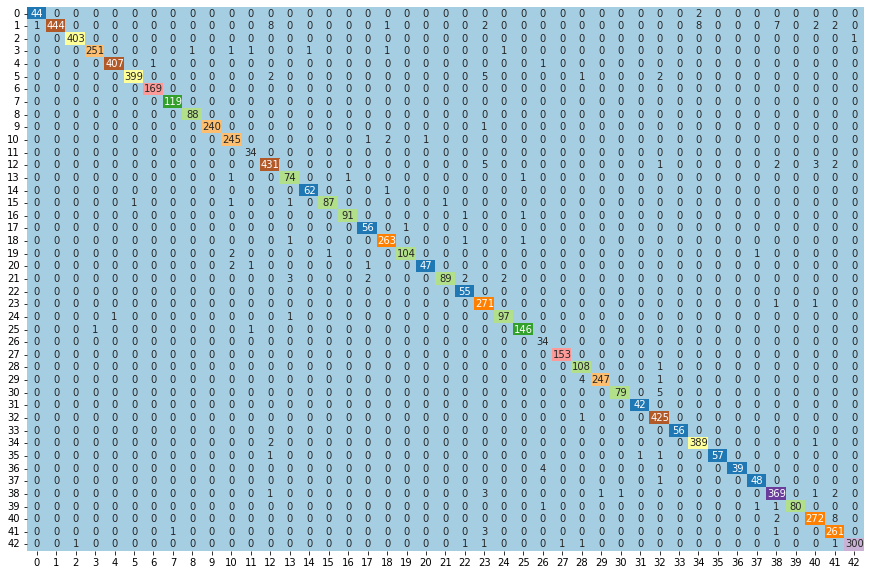

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm11 = metrics.confusion_matrix(y_test_arg_tk_rn, Y_pred_tk_rn)
plt.figure(figsize=(15,10))
sns.heatmap(cm11, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm11.diagonal()/cm11.sum(axis=1) * 100
balanced_tk_ResNet50_152_acc11 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_ResNet50_152_acc11}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='maroon')

Class_Label,Accuracy
0,95.65
1,93.47
2,99.75
3,97.67
4,99.51
5,97.56
6,100.00
7,100.00
8,100.00
9,99.59


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_rn, Y_pred_tk_rn)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_rn, Y_pred_tk_rn,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.979204
Precision: 0.979798
Recall: 0.979204
F1 score: 0.979230


In [ ]:
mod="balanced_tk_ResNet50_152"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df11 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df11


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_ResNet50_152,0.979203878540444,0.9797979853103101,0.979203878540444,0.9792299062126015


In [ ]:
# saving the dataframe
df11.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_ResNet50_152.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model11.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_ResNet50_152.h5")


In [ ]:
# saving classification report to csv
clsf_report = pd.DataFrame(classification_report(y_true = y_test_arg_tk_rn,  y_pred =Y_pred_tk_rn, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_tk_ResNet50_152.csv', index= True)


## Model 12- ResNet50-50 layer-TOMEK 

In [ ]:
# Resnet 50

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50


In [ ]:
resnet_preTrained = tf.keras.applications.ResNet50V2(
    include_top=False,
    weights='imagenet',
    input_shape=(32,32, 3),
)


In [ ]:
#taking 50th layer of resnet50V2 as an output layer
x = resnet_preTrained.layers[50].output
x = Flatten()(x)                                       #flattening
x = Dropout(0.1)(x)                                    #dropout
output = Dense(43, activation= 'softmax')(x)
model12 = Model(inputs = resnet_preTrained.input, outputs = output)
model12.summary()


Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_8[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 pool1_pad (ZeroPadding2D)      (None, 18, 18, 64)   0           ['conv1_conv[0][0]']             
                                                                                            

In [ ]:
#optimizer
optim = tf.keras.optimizers.Adam(
    learning_rate=0.001,epsilon=1e-07, amsgrad=False,
    name='Adam'
)


In [ ]:
#compiling the model
model12.compile(optimizer=optim, loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
#callbacks
checkpoint = ModelCheckpoint('./best_model.h5', monitor='val_accuracy', save_best_only=True, mode='max')

early = EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)

reduceLR = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.001)


In [ ]:
#training the model
n_epochs = 25
history12 =  model12.fit(X_train_t, y_train_t,  batch_size = 256, validation_data = (X_val_t, y_val_t), epochs = n_epochs, verbose = 1)


Epoch 1/25
98/98 [==============================] - 5s 33ms/step - loss: 0.7275 - accuracy: 0.8128 - val_loss: 0.4174 - val_accuracy: 0.8635
Epoch 2/25
98/98 [==============================] - 3s 28ms/step - loss: 0.0536 - accuracy: 0.9841 - val_loss: 0.2935 - val_accuracy: 0.9093
Epoch 3/25
98/98 [==============================] - 3s 28ms/step - loss: 0.0303 - accuracy: 0.9907 - val_loss: 0.0799 - val_accuracy: 0.9770
Epoch 4/25
98/98 [==============================] - 3s 28ms/step - loss: 0.0134 - accuracy: 0.9962 - val_loss: 0.0800 - val_accuracy: 0.9781
Epoch 5/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0130 - accuracy: 0.9964 - val_loss: 0.1906 - val_accuracy: 0.9470
Epoch 6/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0217 - accuracy: 0.9935 - val_loss: 0.4136 - val_accuracy: 0.8947
Epoch 7/25
98/98 [==============================] - 3s 27ms/step - loss: 0.0152 - accuracy: 0.9952 - val_loss: 0.1279 - val_accuracy: 0.9600
Epoch 8/25
98

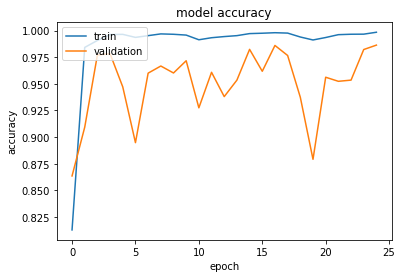

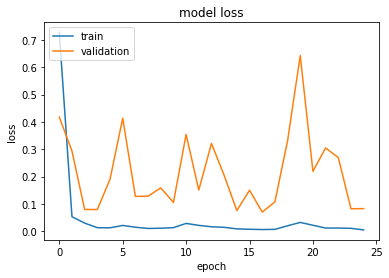

In [ ]:
# summarize history for accuracy
plt.plot(history12.history['accuracy'])
plt.plot(history12.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history12.history['loss'])
plt.plot(history12.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [ ]:
Y_pred_tk_rs = np.argmax(model12.predict(X_test_t), axis=1)


In [ ]:
Y_pred_tk_rs


array([ 1,  5, 18, ...,  3, 22, 38])

In [ ]:
y_test_arg_tk_rs=np.argmax(y_test_t,axis=1)


In [ ]:
print(classification_report(y_test_arg_tk_rs, Y_pred_tk_rs))


              precision    recall  f1-score   support

           0       0.98      0.98      0.98        46
           1       0.99      0.99      0.99       475
           2       0.99      0.99      0.99       404
           3       0.99      1.00      1.00       257
           4       1.00      1.00      1.00       409
           5       1.00      1.00      1.00       409
           6       0.99      1.00      1.00       169
           7       1.00      0.99      1.00       119
           8       1.00      1.00      1.00        88
           9       1.00      1.00      1.00       241
          10       0.98      1.00      0.99       249
          11       0.97      1.00      0.99        34
          12       0.99      0.98      0.99       444
          13       0.96      0.92      0.94        77
          14       1.00      0.97      0.98        63
          15       0.99      1.00      0.99        91
          16       0.99      1.00      0.99        93
          17       1.00    

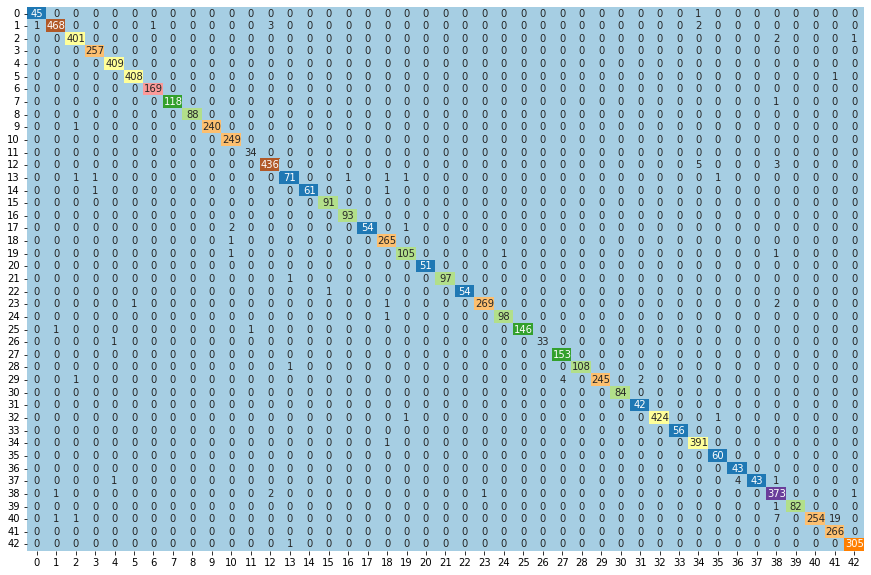

In [ ]:
from sklearn.metrics import precision_score,recall_score,f1_score,accuracy_score,confusion_matrix
import sklearn.metrics as metrics
cm12 = metrics.confusion_matrix(y_test_arg_tk_rs, Y_pred_tk_rs)
plt.figure(figsize=(15,10))
sns.heatmap(cm12, annot=True,cbar = False, cmap='Paired', fmt="d")
plt.show()


In [ ]:
classwise_acc = cm12.diagonal()/cm12.sum(axis=1) * 100
balanced_tk_ResNet50_50_acc12 = classwise_acc.tolist()

In [ ]:
cls_acc = pd.DataFrame({'Class_Label':[CLASS_ID[i] for i in range(43)], 'Accuracy': balanced_tk_ResNet50_50_acc12}, columns = ['Class_Label', 'Accuracy'])
cls_acc.style.format({"Accuracy": "{:,.2f}",}).hide_index().bar(subset=["Accuracy"], color='tomato')

Class_Label,Accuracy
0,97.83
1,98.53
2,99.26
3,100.00
4,100.00
5,99.76
6,100.00
7,99.16
8,100.00
9,99.59


In [ ]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test_arg_tk_rs, Y_pred_tk_rs)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test_arg_tk_rs, Y_pred_tk_rs,average='weighted')
print('F1 score: %f' % f1)


Accuracy: 0.987369
Precision: 0.987724
Recall: 0.987369
F1 score: 0.987319


In [ ]:
mod="balanced_tk_ResNet50_50"
data = np.array([[mod,accuracy,precision,recall,f1]]) 
df12 = pd.DataFrame(data, columns = ['Model','Accuracy', 'Precision','Recall', 'F1 Score'])
df12


,Model,Accuracy,Precision,Recall,F1 Score
0,balanced_tk_ResNet50_50,0.9873692268435825,0.9877236284365614,0.9873692268435825,0.987318809515716


In [ ]:
# saving the dataframe
df12.to_csv('/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_ResNet50_50.csv',encoding = 'utf-8-sig')


In [ ]:
# Saving the model
model12.save("/content/drive/MyDrive/DBDA_PROJECT/training/balanced_tk_ResNet50_50.h5")


In [ ]:

clsf_report = pd.DataFrame(classification_report(y_true =y_test_arg_tk_rs,  y_pred = Y_pred_tk_rs, output_dict=True)).transpose()
clsf_report.to_csv('/content/drive/MyDrive/DBDA_PROJECT/clf_report/balanced_tk_ResNet50_50.csv', index= True)


## Making DataFrame of class-wise Accuracy

In [ ]:
zipped = list(zip(imbalance_cnn_acc1, imbalanced_ResNet50_152_acc2, imbalanced_ResNet_L50_acc3, balanced_SMOTE_CNN_acc4, 
balanced_SMOTE_ResNet_152_acc5, balanced_SMOTE_ResNet_50_acc6, balanced_WT_cnn_acc7, balanced_wt_ResNet_152_acc8, 
balanced_wt_ResNet_50_acc9, balanced_tk_cnn_acc10, balanced_tk_ResNet50_152_acc11, balanced_tk_ResNet50_50_acc12 ))

In [ ]:
Accuracy = pd.DataFrame(zipped, columns=['imbalance_cnn_acc1', 'imbalanced_ResNet50_152_acc2', 'imbalanced_ResNet_L50_acc3', 'balanced_SMOTE_CNN_acc4', 
'balanced_SMOTE_ResNet_152_acc5', 'balanced_SMOTE_ResNet_50_acc6', 'balanced_WT_cnn_acc7', 'balanced_wt_ResNet_152_acc8', 
'balanced_wt_ResNet_50_acc9', 'balanced_tk_cnn_acc10', 'balanced_tk_ResNet50_152_acc11', 'balanced_tk_ResNet50_50_acc12'])

In [ ]:
Accuracy

,imbalance_cnn_acc1,imbalanced_ResNet50_152_acc2,imbalanced_ResNet_L50_acc3,balanced_SMOTE_CNN_acc4,balanced_SMOTE_ResNet_152_acc5,balanced_SMOTE_ResNet_50_acc6,balanced_WT_cnn_acc7,balanced_wt_ResNet_152_acc8,balanced_wt_ResNet_50_acc9,balanced_tk_cnn_acc10,balanced_tk_ResNet50_152_acc11,balanced_tk_ResNet50_50_acc12
0,100.000000,80.555556,97.222222,100.000000,98.929336,100.000000,97.222222,100.000000,100.000000,86.956522,95.652174,97.826087
1,96.916300,95.374449,97.577093,94.004796,98.321343,96.642686,91.409692,98.458150,98.017621,93.473684,93.473684,98.526316
2,99.544419,99.544419,100.000000,100.000000,99.134199,99.567100,99.316629,99.316629,100.000000,100.000000,99.752475,99.257426
3,98.490566,98.113208,99.245283,98.623853,97.247706,100.000000,86.415094,98.113208,98.490566,98.443580,97.665370,100.000000
4,99.762470,100.000000,100.000000,99.782135,99.346405,100.000000,99.049881,100.000000,100.000000,99.511002,99.511002,100.000000
5,99.768519,100.000000,99.537037,99.322799,98.194131,100.000000,99.768519,100.000000,100.000000,99.511002,97.555012,99.755501
6,100.000000,98.148148,100.000000,100.000000,100.000000,100.000000,100.000000,99.382716,100.000000,100.000000,100.000000,100.000000
7,98.290598,99.145299,95.726496,99.800000,97.800000,100.000000,95.726496,99.145299,99.145299,100.000000,100.000000,99.159664
8,96.296296,98.765432,100.000000,100.000000,100.000000,100.000000,97.530864,100.000000,100.000000,100.000000,100.000000,100.000000
9,100.000000,100.000000,99.559471,100.000000,100.000000,100.000000,98.237885,100.000000,100.000000,100.000000,99.585062,99.585062


In [ ]:
Accuracy.to_csv('/content/drive/MyDrive/DBDA_PROJECT/AccuracyO.csv')